# KDA Demo / Antiporter Tutorial

## Table of Contents

1. Introduction to Cycle Kinetics
2. Kinetic Diagram Creation
3. KDA Utilities
4. KDA Calculations & Expressions
5. Future Work 

## 1. Introduction to Cycle Kinetics

### Biochemical Equations

$ 
\begin{flalign}
    k_{A, B} &- \text{Forward rate} \\
    k_{B, A} &- \text{Reverse rate}
\end{flalign}
$

$ 
\begin{equation}
    A + \gamma <=> {B}
\end{equation}
$

### Driving Kinetic Cycles

Kinetic cycles are driven by thermodynamic driving forces, which dictate the preferred direction of a cycle when present. The driving force, denoted $\chi$, is calculated from the difference of chemical potentials for a given ligand. For example, for a system involving some ligand M with inside and outside concentrations $\text{M}_{\text{i}}$ and $\text{M}_{\text{o}}$, the chemical potentials are defined

$
\begin{flalign*}
    \mu_{\text{M}_{\text{i}}} &= \mu_{\text{M}}^{o} + kT \ln \left( \frac{[\text{M}_{\text{i}}]}{[\text{M}_{\text{ref}}]} \right) \\
    \mu_{\text{M}_{\text{o}}} &= \mu_{\text{M}}^{o} + kT \ln \left( \frac{[\text{M}_{\text{o}}]}{[\text{M}_{\text{ref}}]} \right) \text{,}
\end{flalign*}
$ 

where $\mu_{\text{M}}^{o}$ is the standard chemical potential for ligand M and $\text{M}_{\text{ref}}$ is a reference concentration. The difference yields the thermodynamic driving force driving M from inside to outside:

$ 
\begin{equation}
    \chi_{\text{M}} = \mu_{\text{M}_{\text{i}}} - \mu_{\text{M}_{\text{o}}} = kT \ln \left( \frac{[\text{M}_{\text{i}}]}{[\text{M}_{\text{o}}]} \right) \text{.}
\end{equation}
$ 

The driving forces for kinetic cycles are found using the forward and reverse rate-products in a cycle \cite{hill_free_1989}. The driving force for a cycle c is given by:

$ 
\begin{equation}
    \chi_{\text{c}} = kT \ln \left( \frac{\Pi_{+}}{\Pi_{-}} \right)
\end{equation}
$

### State Probabilities

To create the algebraic expressions for the state probabilities at steady-state, a subset of the directional diagrams are summed based on a common target state. This yields $N$ expressions representing the state multiplicities, $\Omega_i$, where the normalization factor, $\Sigma$, is the sum of all directional diagrams:

$
\begin{equation}
    p_i = \frac{\Omega_i}{\Sigma} \text{, where } \Sigma = \sum\limits_{i}^{N} \Omega_{i}
\end{equation}
$

### Net Cycle Fluxes

Net cycle fluxes, denoted $J_{K}$, are the difference of the forward and reverse cycle fluxes in a given cycle. The net cycle flux is the average number of cycle completions per unit time, where the sign tells you which direction (forward or reverse) is preferred. The net cycle flux for a cycle $K$ is defined

$
\begin{equation}
J_{K} = J_{K}^+ - J_{K}^- = \frac{(\Pi_{+} - \Pi_{-})\Sigma_{K}}{\Sigma},
\end{equation}
$

where $\Pi_+$ and $\Pi_-$ are the forward and reverse rate-products for cycle $K$, the product $(\Pi_+ - \Pi_-)\Sigma_{K}$ is the sum of all flux diagrams for cycle $K$ (described below), and $\Sigma$ is the sum of all directional diagrams for the diagram.

## 2. Kinetic Diagram Creation

To use KDA, we must first create the kinetic diagram of interest. For this tutorial we will use a 6-state antiporter model (shown below), with a single leakage transition between the two unbound states.

<center><img src="./6wl_model.png" width="500">

To generate the kinetic diagram we must first define the connectivity matrix, then use a KDA utility to create the edges. Edge weights are assigned based on the values in the connectivity matrix. For our purposes, we will just assign them all values of 1 s$^{-1}$. 

In [1]:
import numpy as np
import networkx as nx

from kda import graph_utils

# create generic diagram
G = nx.MultiDiGraph()

# connectivity matrix
K = np.array([
    [0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [1, 0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 0],
])

# update graph using connectivity matrix
graph_utils.generate_edges(G, K)

Great! Now we have a kinetic diagram. Let's plot our new diagram and see if we got the details right...

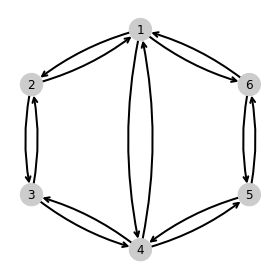

In [39]:
from kda import plotting

# map each node to coordinates that match the original image
node_positions = {i:[np.cos((np.pi/2) + i * (np.pi/3)), np.sin((np.pi/2) + i * (np.pi/3))] for i in range(G.number_of_nodes())}

plotting.draw_diagrams(G, pos=node_positions, curved_arrows=True)

## 3. KDA Utilities

### `graph_utils.generate_edges`

The primary function used for generating kinetic diagrams from the connectivity matrix.

### `graph_utils.add_node_attribute`

This allows us to store data with the graph object itself that are specific to the nodes/states. The graph objects can be pickled for quick loading later:

```python
import pickle
# save graph object to file
pickle.dump(G, open("filename.pickle", "wb"))
# load graph object from file
G = pickle.load(open("filename.pickle", "rb"))
```

so it can be nice to store all the data with the graph object itself if it will be reused in the future. 

As an example, if we wanted to add the node positions to our graph nodes, we could do it with a single line.

In [3]:
G.nodes(data=True)

NodeDataView({0: {}, 1: {}, 3: {}, 5: {}, 2: {}, 4: {}})

In [4]:
graph_utils.add_node_attribute(G, data=node_positions, label="pos")

In [5]:
G.nodes(data=True)

NodeDataView({0: {'pos': [6.123233995736766e-17, 1.0]}, 1: {'pos': [-0.8660254037844385, 0.5000000000000003]}, 3: {'pos': [-1.8369701987210297e-16, -1.0]}, 5: {'pos': [0.866025403784439, 0.4999999999999993]}, 2: {'pos': [-0.8660254037844388, -0.4999999999999997]}, 4: {'pos': [0.8660254037844384, -0.5000000000000004]}})

### `graph_utils.add_graph_attribute`

This function operates similarly to the previous, except it applies the data to the graph object instead. This provides the option to store data in the graph objects that are more general. For example, if we want to store the connectivity matrix with the graph object, we can simply do the following:

In [6]:
graph_utils.add_graph_attribute(G, data=K, label="K")

In [7]:
G.graph["K"]

array([[0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 1, 0]])

### `graph_utils.retrieve_rate_matrix`

If you don't want to store the rate matrix with the graph object, you can run `retrieve_rate_matrix` to retrieve the rate matrix with the current edge weights applied:

In [8]:
graph_utils.retrieve_rate_matrix(G)

array([[0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       [1., 0., 1., 0., 1., 0.],
       [0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0.]])

### `graph_utils.find_all_unique_cycles`

Last but not least, this function allows you to find all cycles of > 3 nodes.

In [9]:
all_cycles = graph_utils.find_all_unique_cycles(G)
print(all_cycles)

[[0, 5, 4, 3, 2, 1], [0, 5, 4, 3], [0, 3, 2, 1]]


## 4. KDA Calculations & Expressions

### Calculation Overview
KDA was created with the intention of programmatically generating the algebraic expressions for state probabilities and fluxes at steady-state. The code roughly follows the following steps: 

1. Kinetic Diagram Generation
2. Intermediate Diagram Generation
3. Raw Expression Generation (SymPy Expression)
4. SymPy Expression Manipulation & Substitution
5. Python `lambda` Function Conversion
6. Final Evaluation

We have already covered step **1** in the previous section. 

Steps **2** & **3** are handled simultaneously using the various functions in `kda.calculations`, but if we want to view the diagrams we can create them directly using the `kda.diagrams` module. 

As an example, let's plot the partial & directional diagrams for our 6-state model.

### 2. Intermediate Diagram Generation

In [10]:
from kda import diagrams

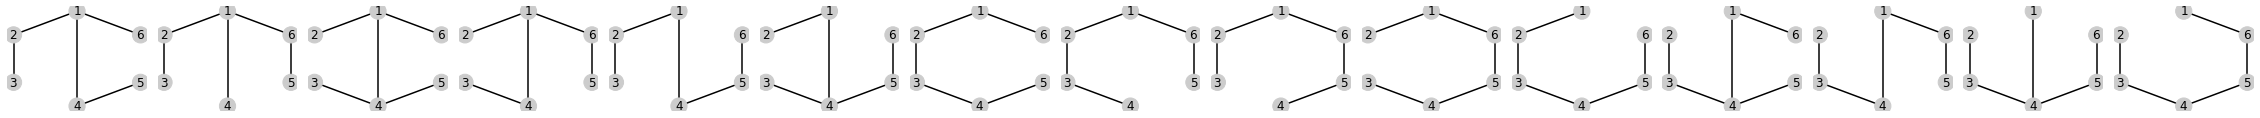

In [11]:
partial_diagrams = diagrams.generate_partial_diagrams(G)
plotting.draw_diagrams(partial_diagrams, pos=node_positions, panel=True, panel_scale=1.75, rows=1, font_size=12)

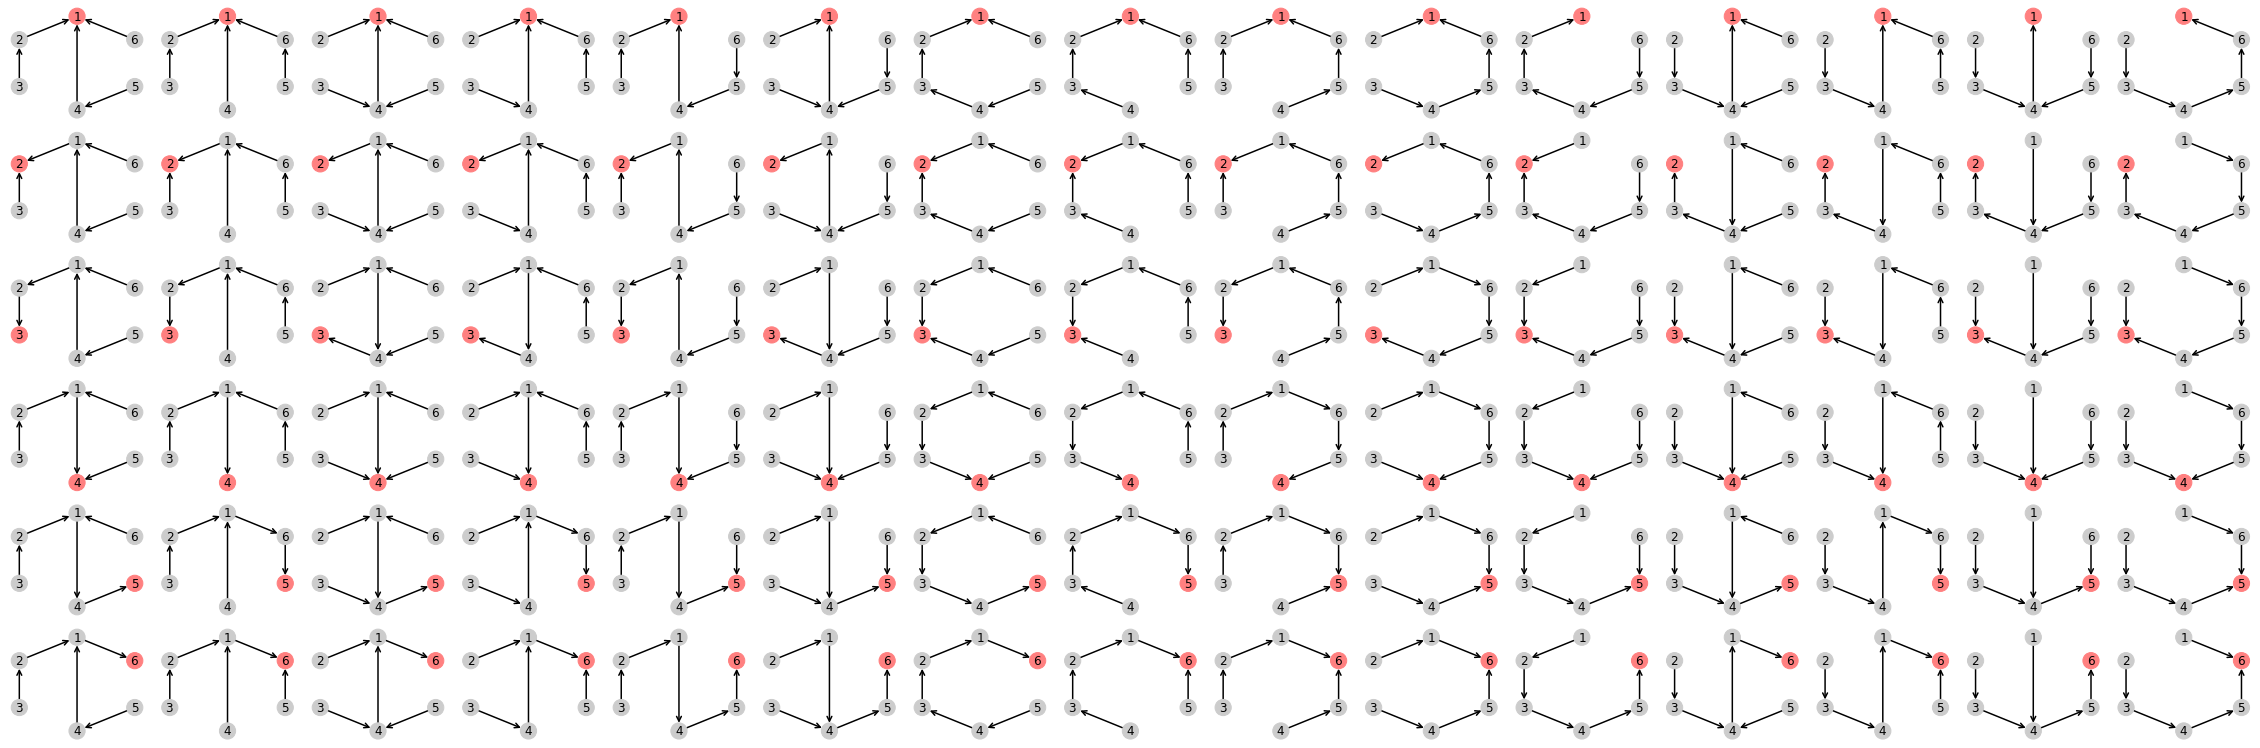

In [12]:
directional_diagrams = diagrams.generate_directional_diagrams(G)
plotting.draw_diagrams(directional_diagrams, pos=node_positions, panel=True, panel_scale=1.75, rows=6, font_size=12, cbt=True)

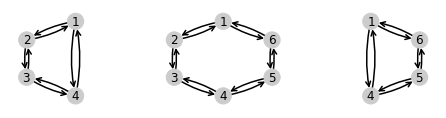

In [13]:
plotting.draw_cycles(G, [all_cycles[2], all_cycles[0], all_cycles[1]], pos=node_positions, panel=True, panel_scale=1.75, font_size=12, curved_arrows=True, cbt=False)

### 3. Raw Expression Generation

The diagrams are fun to look at but are not strictly required to generate expressions. Instead, we can generate the expressions directly.

In [14]:
from kda import calculations

In [15]:
state_prob_exprs = calculations.calc_state_probs(G, key='name', output_strings=True)

All expressions are output as `SymPy` expressions, which can be directly evaluated, variable substituted, converted to strings, converted to $\LaTeX$, etc.

In [16]:
state_prob_exprs[0]

(k21*k32*k41*k54*k61 + k21*k32*k41*k54*k65 + k21*k32*k41*k56*k61 + k21*k32*k43*k54*k61 + k21*k32*k43*k54*k65 + k21*k32*k43*k56*k61 + k21*k32*k45*k56*k61 + k21*k34*k41*k54*k61 + k21*k34*k41*k54*k65 + k21*k34*k41*k56*k61 + k21*k34*k45*k56*k61 + k23*k34*k41*k54*k61 + k23*k34*k41*k54*k65 + k23*k34*k41*k56*k61 + k23*k34*k45*k56*k61)/(k12*k23*k34*k45*k56 + k12*k23*k34*k45*k61 + k12*k23*k34*k45*k65 + k12*k23*k34*k54*k61 + k12*k23*k34*k54*k65 + k12*k23*k34*k56*k61 + k12*k23*k41*k54*k61 + k12*k23*k41*k54*k65 + k12*k23*k41*k56*k61 + k12*k23*k43*k54*k61 + k12*k23*k43*k54*k65 + k12*k23*k43*k56*k61 + k12*k23*k45*k56*k61 + k12*k32*k41*k54*k61 + k12*k32*k41*k54*k65 + k12*k32*k41*k56*k61 + k12*k32*k43*k54*k61 + k12*k32*k43*k54*k65 + k12*k32*k43*k56*k61 + k12*k32*k45*k56*k61 + k12*k34*k41*k54*k61 + k12*k34*k41*k54*k65 + k12*k34*k41*k56*k61 + k12*k34*k45*k56*k61 + k14*k21*k32*k45*k56 + k14*k21*k32*k45*k61 + k14*k21*k32*k45*k65 + k14*k21*k32*k54*k61 + k14*k21*k32*k54*k65 + k14*k21*k32*k56*k61 + k14*k21*k

Now let's take a crack at the net cycle fluxes. They require a little more information, such as a user-specified cycle and cycle direction (i.e. "order"). 

In [17]:
# need to pick which direction is "positive" for each cycle
cycle_labels = ["c", "b", "a"]
cycle_orders = [[0, 1], [5, 0], [0, 1]]

cycles_dict = {}
for label, _cycle, _order in zip(cycle_labels, all_cycles, cycle_orders):
    func = calculations.calc_net_cycle_flux(G, cycle=_cycle, order=_order, key='name', output_strings=True)
    cycles_dict[label] = {"cycle": _cycle, "order": _order, "func": func}

Cycle [0, 5, 4, 3, 2, 1] contains all nodes in G. No flux diagrams generated.
No flux diagrams detected for cycle [0, 5, 4, 3, 2, 1]. Sigma K value is 1.


In [18]:
cycles_dict["c"]["func"]

(k12*k23*k34*k45*k56*k61 - k16*k21*k32*k43*k54*k65)/(k12*k23*k34*k45*k56 + k12*k23*k34*k45*k61 + k12*k23*k34*k45*k65 + k12*k23*k34*k54*k61 + k12*k23*k34*k54*k65 + k12*k23*k34*k56*k61 + k12*k23*k41*k54*k61 + k12*k23*k41*k54*k65 + k12*k23*k41*k56*k61 + k12*k23*k43*k54*k61 + k12*k23*k43*k54*k65 + k12*k23*k43*k56*k61 + k12*k23*k45*k56*k61 + k12*k32*k41*k54*k61 + k12*k32*k41*k54*k65 + k12*k32*k41*k56*k61 + k12*k32*k43*k54*k61 + k12*k32*k43*k54*k65 + k12*k32*k43*k56*k61 + k12*k32*k45*k56*k61 + k12*k34*k41*k54*k61 + k12*k34*k41*k54*k65 + k12*k34*k41*k56*k61 + k12*k34*k45*k56*k61 + k14*k21*k32*k45*k56 + k14*k21*k32*k45*k61 + k14*k21*k32*k45*k65 + k14*k21*k32*k54*k61 + k14*k21*k32*k54*k65 + k14*k21*k32*k56*k61 + k14*k21*k34*k45*k56 + k14*k21*k34*k45*k61 + k14*k21*k34*k45*k65 + k14*k21*k34*k54*k61 + k14*k21*k34*k54*k65 + k14*k21*k34*k56*k61 + k14*k21*k43*k54*k61 + k14*k21*k43*k54*k65 + k14*k21*k43*k56*k61 + k14*k23*k34*k45*k56 + k14*k23*k34*k45*k61 + k14*k23*k34*k45*k65 + k14*k23*k34*k54*k61 + k

In [19]:
cycles_dict["a"]["func"]

(k12*k23*k34*k41 - k14*k21*k32*k43)*(k54*k61 + k54*k65 + k56*k61)/(k12*k23*k34*k45*k56 + k12*k23*k34*k45*k61 + k12*k23*k34*k45*k65 + k12*k23*k34*k54*k61 + k12*k23*k34*k54*k65 + k12*k23*k34*k56*k61 + k12*k23*k41*k54*k61 + k12*k23*k41*k54*k65 + k12*k23*k41*k56*k61 + k12*k23*k43*k54*k61 + k12*k23*k43*k54*k65 + k12*k23*k43*k56*k61 + k12*k23*k45*k56*k61 + k12*k32*k41*k54*k61 + k12*k32*k41*k54*k65 + k12*k32*k41*k56*k61 + k12*k32*k43*k54*k61 + k12*k32*k43*k54*k65 + k12*k32*k43*k56*k61 + k12*k32*k45*k56*k61 + k12*k34*k41*k54*k61 + k12*k34*k41*k54*k65 + k12*k34*k41*k56*k61 + k12*k34*k45*k56*k61 + k14*k21*k32*k45*k56 + k14*k21*k32*k45*k61 + k14*k21*k32*k45*k65 + k14*k21*k32*k54*k61 + k14*k21*k32*k54*k65 + k14*k21*k32*k56*k61 + k14*k21*k34*k45*k56 + k14*k21*k34*k45*k61 + k14*k21*k34*k45*k65 + k14*k21*k34*k54*k61 + k14*k21*k34*k54*k65 + k14*k21*k34*k56*k61 + k14*k21*k43*k54*k61 + k14*k21*k43*k54*k65 + k14*k21*k43*k56*k61 + k14*k23*k34*k45*k56 + k14*k23*k34*k45*k61 + k14*k23*k34*k45*k65 + k14*k23*k

### 4. SymPy Expression Manipulation & Substitution 

We output our expressions as `SymPy` expressions because of their ease of manipulation. You can map any current variable to any new variable or expressions, making them ideal for our use case.

In [20]:
import sympy
from sympy import symbols

# first you have to create the symbols for both sides of the map
k12, k21, k23, k32, k34, k43, k45, k54, k56, k65, k61, k16, k14, k41 = sympy.symbols(
    "k12 k21 k23 k32 k34 k43 k45 k54 k56 k65 k61 k16 k14, k41")
H_on, H_off, Na_on, Na_off, k_conf, k_leak,  H_in, H_out, Na_in, Na_out = sympy.symbols(
    "H_on, H_off, Na_on, Na_off, k_conf, k_leak, H_in, H_out, Na_in, Na_out")

# substitution map based on Fig. 1
sub_map = {
    k12 : H_on*H_out,
    k21 : H_off,
    k23 : k_conf,
    k32 : k_conf,
    k34 : H_off,
    k43 : H_on*H_in,
    k45 : Na_on*Na_in,
    k54 : Na_off,
    k56 : k_conf,
    k65 : k_conf,
    k61 : Na_off,
    k16 : Na_on*Na_out,
    k14 : k_leak, 
    k41 : k_leak,
}

In [21]:
# perform variable subsitutions and add to dictionary
for cycle_label, _dict in cycles_dict.items():
    _dict["func_simple"] = _dict["func"].subs(sub_map).simplify()

In [22]:
cycles_dict["a"]["func_simple"]

-H_off*H_on*Na_off*k_conf*k_leak*(H_in - H_out)*(Na_off + 2*k_conf)/(H_in*H_off*H_on*Na_off**2*k_conf + H_in*H_off*H_on*Na_off**2*k_leak + 2*H_in*H_off*H_on*Na_off*Na_on*Na_out*k_conf + 2*H_in*H_off*H_on*Na_off*k_conf**2 + 2*H_in*H_off*H_on*Na_off*k_conf*k_leak + 2*H_in*H_off*H_on*Na_on*Na_out*k_conf**2 + 2*H_in*H_on**2*H_out*Na_off**2*k_conf + 4*H_in*H_on**2*H_out*Na_off*k_conf**2 + 2*H_in*H_on*Na_off**2*k_conf*k_leak + 2*H_in*H_on*Na_off*Na_on*Na_out*k_conf**2 + 4*H_in*H_on*Na_off*k_conf**2*k_leak + H_off**2*Na_in*Na_off*Na_on*k_conf + H_off**2*Na_in*Na_off*Na_on*k_leak + 2*H_off**2*Na_in*Na_on**2*Na_out*k_conf + 2*H_off**2*Na_in*Na_on*k_conf*k_leak + 2*H_off**2*Na_off**2*k_leak + H_off**2*Na_off*Na_on*Na_out*k_conf + H_off**2*Na_off*Na_on*Na_out*k_leak + 4*H_off**2*Na_off*k_conf*k_leak + 2*H_off**2*Na_on*Na_out*k_conf*k_leak + 2*H_off*H_on*H_out*Na_in*Na_off*Na_on*k_conf + 2*H_off*H_on*H_out*Na_in*Na_on*k_conf**2 + H_off*H_on*H_out*Na_off**2*k_conf + H_off*H_on*H_out*Na_off**2*k_lea

### 5. Python `lambda` Function Conversion

In [23]:
from kda import expressions

# have to define the variable names you want to use for your lambda function
rate_names = ["H_on, H_off, Na_on, Na_off, k_conf, k_leak, H_in, H_out, Na_in, Na_out"]

# generate the lambda function for each net cycle flux
J_a = expressions.construct_lambda_funcs(cycles_dict["a"]["func_simple"], rate_names)
J_b = expressions.construct_lambda_funcs(cycles_dict["b"]["func_simple"], rate_names)
J_c = expressions.construct_lambda_funcs(cycles_dict["c"]["func_simple"], rate_names)

In [24]:
J_a

<function _lambdifygenerated(H_on, H_off, Na_on, Na_off, k_conf, k_leak, H_in, H_out, Na_in, Na_out)>

### 6. Final Evaluation

In [25]:
H_on = 1.120092e10
H_off = 1.775e3
Na_on = 3.011e9
Na_off = 9.033e7
k_conf = 100
H_in = 3.1622776601683795e-9
H_out = 3.162277660168379e-6
Na_in = 0.01
Na_out = 0.15

leak_arr = np.logspace(-2, 2, 101)

In [26]:
ja_arr = np.zeros((leak_arr.size, ), dtype=np.float64)
jb_arr = np.zeros((leak_arr.size, ), dtype=np.float64)
jc_arr = np.zeros((leak_arr.size, ), dtype=np.float64)

J_H_arr = np.zeros((leak_arr.size, ), dtype=np.float64)
J_Na_arr = np.zeros((leak_arr.size, ), dtype=np.float64)

for i, k_leak in enumerate(leak_arr):
    # calculate the net cycle fluxes
    ja = J_a(H_on, H_off, Na_on, Na_off, k_conf, k_leak, H_in, H_out, Na_in, Na_out)
    jb = J_b(H_on, H_off, Na_on, Na_off, k_conf, k_leak, H_in, H_out, Na_in, Na_out)
    jc = J_c(H_on, H_off, Na_on, Na_off, k_conf, k_leak, H_in, H_out, Na_in, Na_out)

    ja_arr[i] = ja
    jb_arr[i] = jb
    jc_arr[i] = jc
    # calculate the operational fluxes for H and Na
    J_H_arr[i] = jc + ja
    J_Na_arr[i] = jc + jb

(0.01, 100.0)

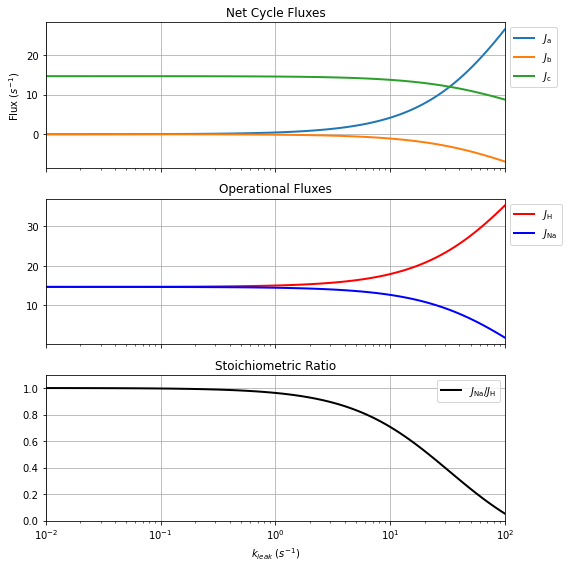

In [27]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, figsize=(8, 8), sharex=True, tight_layout=True)

axs[0].semilogx(leak_arr, ja_arr, '-', lw=2, label=r"$J_\mathrm{a}$")
axs[0].semilogx(leak_arr, jb_arr, '-', lw=2, label=r"$J_\mathrm{b}$")
axs[0].semilogx(leak_arr, jc_arr, '-', lw=2, label=r"$J_\mathrm{c}$")
axs[0].set_title("Net Cycle Fluxes")
axs[0].set_ylabel(r"Flux ($s^{-1}$)")
# axs[0].set_ylim(0, 20)
axs[0].legend(bbox_to_anchor=(1, 1))
axs[0].grid(True)

axs[1].semilogx(leak_arr, J_H_arr, '-', lw=2, color="red", label=r"$J_\mathrm{H}$")
axs[1].semilogx(leak_arr, J_Na_arr, '-', lw=2, color="blue", label=r"$J_\mathrm{Na}$")
axs[1].set_title("Operational Fluxes")
axs[1].legend(bbox_to_anchor=(1, 1))
axs[1].grid(True)

axs[2].semilogx(leak_arr, J_Na_arr/J_H_arr, '-', lw=2, color="black", label=r"$J_\mathrm{Na}/J_\mathrm{H}$")
axs[2].set_title("Stoichiometric Ratio")
axs[2].set_xlabel(r"$k_{leak}$ ($s^{-1}$)")
axs[2].set_ylim(0, 1.1)
axs[2].legend(bbox_to_anchor=(1, 1))
axs[2].grid(True)

axs[0].set_xlim(leak_arr[0], leak_arr[-1])

<center><img src="./6wl_model.png" width="500">

## 5. Future Work

### API Improvements

The KDA API could use a great deal of improvement. Right now things are a bit clunky and can lead easily to errors. 

For example, most diagrams and calculations require the user to use many different functions that all require similar information. There should be a way to minimize the burden on the user while providing the same output. Moving towards an object-oriented approach would likely help with this, where the user creates their "universe" (i.e. graph) and can easily retrieve info about the graph by just calling built-in methods.

```python
import kda
# retrieve graph data from file
G = kda.read_graph("./test_graph.csv")
# plot the directional diagrams
G.directional.plot()
# get the state probability expressions
state_probs = G.probability.collect_expressions(norm=False)
```

Another example, when generating the net cycle fluxes, you need to know the "order" (i.e. direction) for each cycle, which is input as a pair of nodes in the cycle. Then once the net cycle fluxes are generated, there is no real way of linking one cycle to the next, making it difficult to generate the operational fluxes for a given system. If we can find a way to input more data about the system (or create & store it in the diagram object) we could make this process a lot easier. Even for the net transition fluxes, it would be cool to have an API like the following:

```python
import kda
# retrieve graph data from file
G = kda.read_graph("./test_graph.csv")
# get the expression for the one-way transition flux j_56
j_56_expr = G.flux(i=5, j=6, net=False, expr=True)
# get the expression for the net transition flux from 5->6
J_56_expr = G.flux(i=5, j=6, net=True, expr=True)
```

### Error Propagation

First we need to define a function that can convert the `SymPy` expression for the net cycle flux into the expression for the standard error of the net cycle flux.

In [28]:
def construct_df(f, simplify=False):
    """
    Uses the standard error equation to generate the algebraic expression
    for the standard error of an input expression.
    
    Parameters
    ----------
    f: SymPy expression
    simplify_df: bool
    return_lambda: bool
    """

    # retrieve variables from input SymPy expression
    variables = [str(v) for v in f.free_symbols]

    # generate the SymPy symbols from input variable names
    symbols = sympy.symbols(variables)
    d_symbols = sympy.symbols(list("d_" + k for k in variables))
    
    # iterate over each variable (xk) to get the partial derivatives
    df = 0
    for xk, d_xk in zip(symbols, d_symbols):
        # take the partial derivative of f with respect to xk
        df_dxk = f.diff(xk)
        if simplify:
            df_dxk = df_dxk.simplify()
        # square the product of the partial derivative and the
        # error for xk and add to expression
        df += (df_dxk * d_xk) ** 2

    # take the square root of the sum
    df = sympy.sqrt(df)

    return df

Construct the SymPy expression for the standard error for the net cycle flux for the productive cycle of **G**.

In [29]:
dJc_sympy = construct_df(f=cycles_dict["c"]["func_simple"])

Now simplify the expression by plugging in all constant values, but leaving a constant factor `d_perc` for scaling all standard errors by a relative factor.

In [30]:
d_perc = sympy.symbols("d_perc")

dJc_simple = dJc_sympy.subs(
    dict(
        H_on = 1.120092e10,
        H_off = 1.775e3,
        Na_on = 3.011e9,
        Na_off = 9.033e7,
        k_conf = 100,
        k_leak = 0.01,
        H_in = 3.1622776601683795e-9,
        H_out = 3.162277660168379e-6,
        Na_in = 0.01,
        Na_out = 0.15,
        d_H_on = d_perc * 1.120092e10,
        d_H_off = d_perc * 1.775e3,
        d_Na_on = d_perc * 3.011e9,
        d_Na_off = d_perc * 9.033e7,
        d_H_in = d_perc * 3.1622776601683795e-9,
        d_H_out = d_perc * 3.162277660168379e-6,
        d_Na_in = d_perc * 0.01,
        d_Na_out = d_perc * 0.15,
        d_k_leak = d_perc * 0.01,
    ),
)
dJc_simple = dJc_simple.simplify()

Now we have a function to calculate the standard error of **J_c** as a function of the error for the conformational change rate, **d_k_conf**, and the relative error of all other parameters, **d_perc**.

In [31]:
val_dict = {
    "H_on": 1.120092e10,
    "H_off": 1.775e3,
    "Na_on": 3.011e9,
    "Na_off": 9.033e7,
    "k_conf": 100,
    "k_leak": 0.01,
    "H_in": 3.1622776601683795e-9,
    "H_out": 3.162277660168379e-6,
    "Na_in": 0.01,
    "Na_out": 0.15,
}

Jc = float(cycles_dict["c"]["func_simple"].subs(val_dict))

dJc_lambda = sympy.lambdify(["d_k_conf", "d_perc"], dJc_simple)

In [32]:
dJc_simple

13.4126632336768*sqrt(0.000110423730922239*d_k_conf**2 + d_perc**2)

In [33]:
rel_errors = np.arange(0, 10, 2) / 10
d_k_conf_arr = np.arange(0, 91)

dJ_arr = np.zeros((rel_errors.size, d_k_conf_arr.size))

for i, rel_err in enumerate(rel_errors):
    for j, d_kc in enumerate(d_k_conf_arr):
        dJ_arr[i, j] = dJc_lambda(d_k_conf=d_kc, d_perc=rel_err)

J_perc_err = 100 * (dJ_arr / Jc)
k_conf_perc_err = 100 * (d_k_conf_arr / val_dict["k_conf"])

In [34]:
def plot_dJ_vs_d_k_conf(k_conf_perc_err, J_perc_err, rel_errors):

    fig = plt.figure(figsize=(7, 5), tight_layout=True)
    ax = fig.add_subplot(111)

#     ax.plot(np.arange(0, 100), np.arange(0, 100), ls="--", color="black")
    
    for i, rel_err in enumerate(rel_errors):
        ax.plot(k_conf_perc_err, J_perc_err[i], lw=2, label=f"{100*rel_err:.0f}%")
    
    ax.set_xlabel(r"$\delta k_{conf}$ (%)")
    ax.set_ylabel(r"$\delta J$ (%)")
    ax.set_title(r"G1 Error Propagation")

    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.grid(True)
    
    # custom handling to reverse the legend order
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 1), title=r"$\delta_{perc}$")
    
    return fig

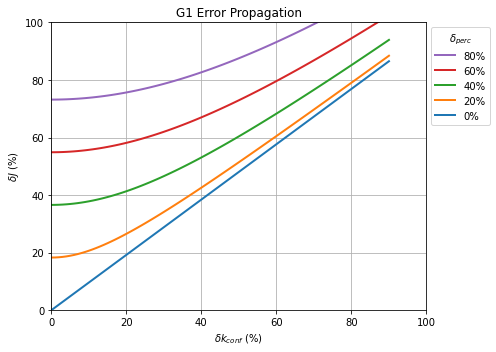

In [35]:
err_fig = plot_dJ_vs_d_k_conf(k_conf_perc_err, J_perc_err, rel_errors)

# err_fig.savefig("dJ_vs_dk_conf.png", dpi=300)

### Algorithm Improvements & Hill's Extended Diagram Method 

KDA currently uses inefficient path-finding algorithms (developed by yours truly) which likely use more memory and time than is necessary. There are many ways of solving the problems we do in KDA that would improve overall space and time complexity.

Additionally, T.L. Hill has an "extended diagram method" which does not rely on generating some of our intermediate diagrams which could lead to much faster expression resolution. I have barely looked into this solution so it is not yet clear how difficult it would be to implement in Python, but the result would likely be simpler than any of the algorithms for some cases.